# Importation des bibliothèques du travail

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 
from sklearn.model_selection import RandomizedSearchCV

# Importation de la base des données

In [7]:
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\sda_ML\\data\\Loan_default.csv")

# Analyse exploratoire

In [8]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

| **Variable**       | **Explication**                                                                  |
| ------------------ | -------------------------------------------------------------------------------- |
| **LoanID**         | Identifiant unique du prêt (chaîne de caractères).                               |
| **Age**            | Âge de l’emprunteur (en années).                                                 |
| **Income**         | Revenu annuel de l’emprunteur (en unités monétaires, ex. dollars).               |
| **LoanAmount**     | Montant du prêt demandé.                                                         |
| **CreditScore**    | Score de crédit de l’emprunteur (ex. FICO, évalue la solvabilité).               |
| **MonthsEmployed** | Nombre de mois travaillés chez l’employeur actuel.                               |
| **NumCreditLines** | Nombre total de lignes de crédit (cartes, prêts, etc.) que possède l’emprunteur. |
| **InterestRate**   | Taux d’intérêt du prêt (en %).                                                   |
| **LoanTerm**       | Durée du prêt (en mois).                                                         |
| **DTIRatio**       | *Debt-to-Income Ratio* = ratio dette/revenu de l’emprunteur.                     |
| **Education**      | Niveau d’éducation de l’emprunteur (ex. lycée, licence, master…).                |
| **EmploymentType** | Type d’emploi (ex. salarié, indépendant, fonction publique…).                    |
| **MaritalStatus**  | Statut matrimonial (ex. célibataire, marié, divorcé…).                           |
| **HasMortgage**    | Indique si l’emprunteur a déjà un prêt hypothécaire (oui/non).                   |
| **HasDependents**  | Indique si l’emprunteur a des personnes à charge (oui/non).                      |
| **LoanPurpose**    | Raison du prêt (ex. achat voiture, études, consolidation de dettes…).            |
| **HasCoSigner**    | Indique si le prêt a un co-signataire/garant (oui/non).                          |
| **Default**        | Variable cible : 1 si l’emprunteur est en défaut de paiement, 0 sinon.           |


In [10]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


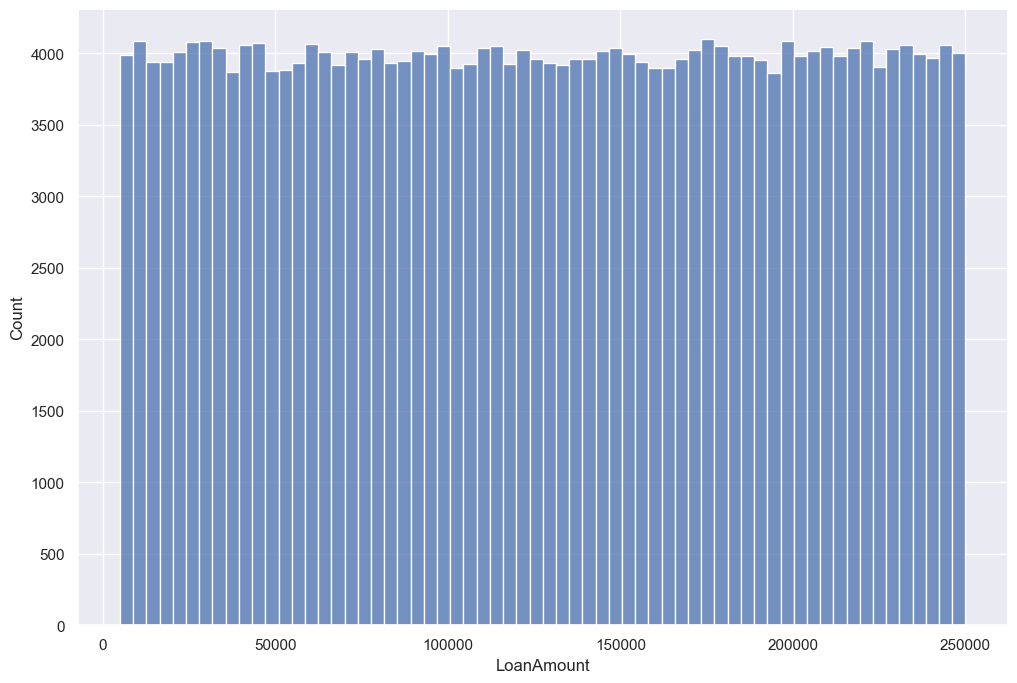

In [11]:
# Distribution de la variable 'LoanAmount' 
sns.set(rc={'figure.figsize':(12,8)}) 
sns.histplot(df['LoanAmount']) 
plt.show()


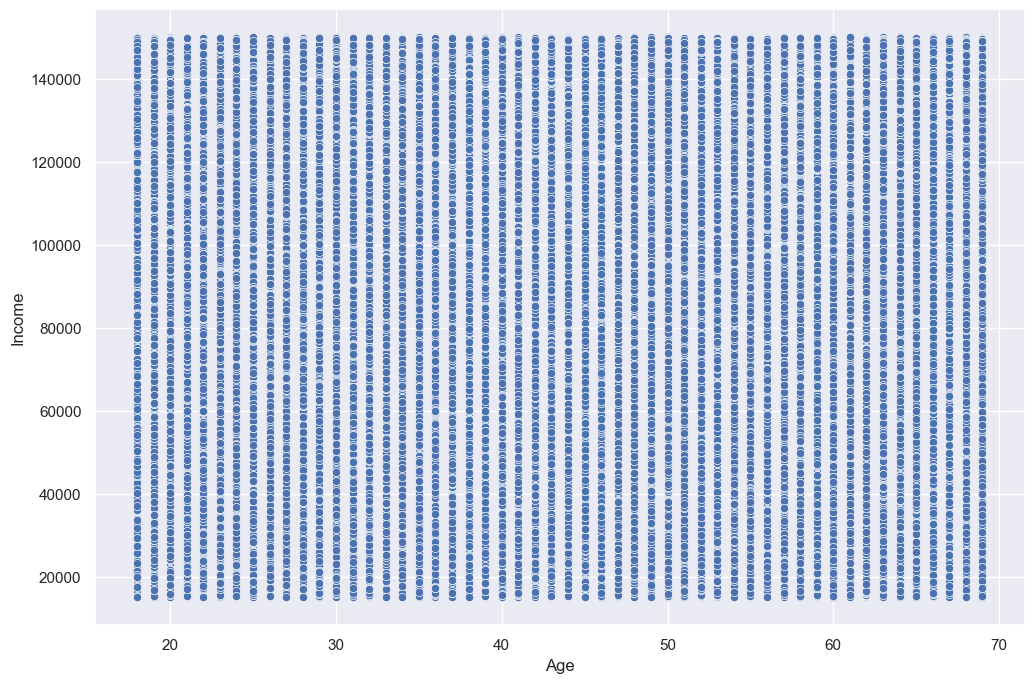

In [12]:
#Distribution de la variable Revenu en fonction de l'âge
sns.set(rc={'figure.figsize':(12,8)}) 
sns.scatterplot(x='Age', y='Income', data=df) 
plt.show()

In [13]:
# Distribution des variables et nuages de points 
#sns.pairplot(df) 
#plt.show() 

In [14]:
qual_vars = df.select_dtypes(include=["object", "category"]).columns

for col in qual_vars:
    print(f"\nVariable : {col}")
    print(df[col].unique())


Variable : LoanID
['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']

Variable : Education
["Bachelor's" "Master's" 'High School' 'PhD']

Variable : EmploymentType
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']

Variable : MaritalStatus
['Divorced' 'Married' 'Single']

Variable : HasMortgage
['Yes' 'No']

Variable : HasDependents
['Yes' 'No']

Variable : LoanPurpose
['Other' 'Auto' 'Business' 'Home' 'Education']

Variable : HasCoSigner
['Yes' 'No']


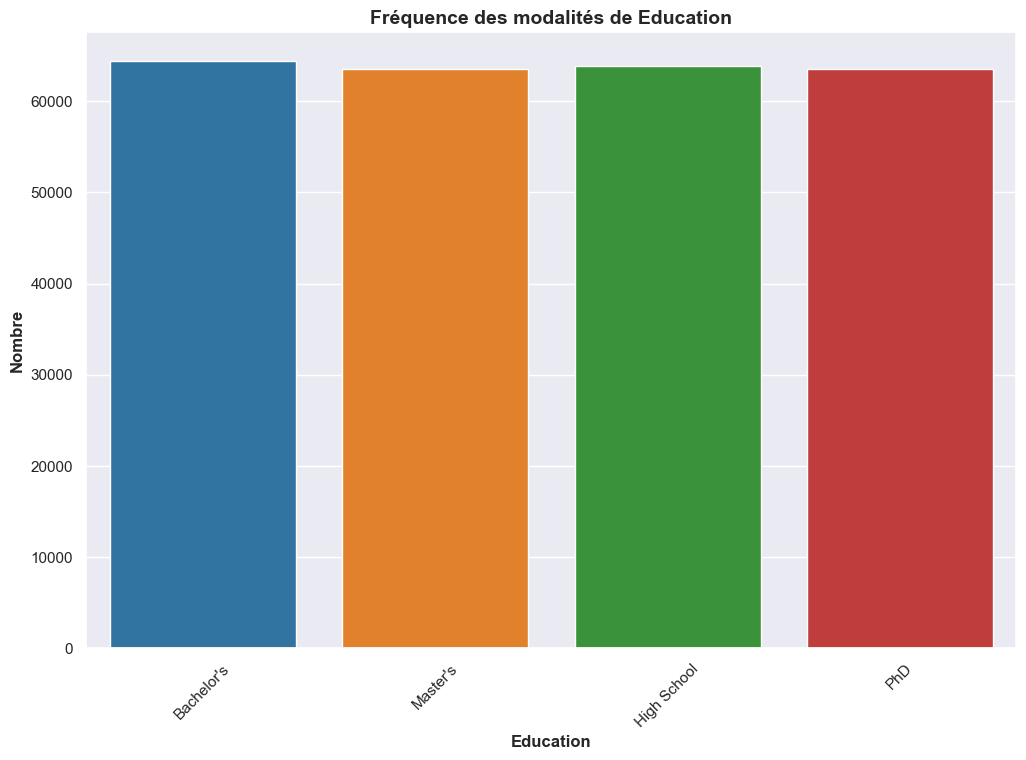

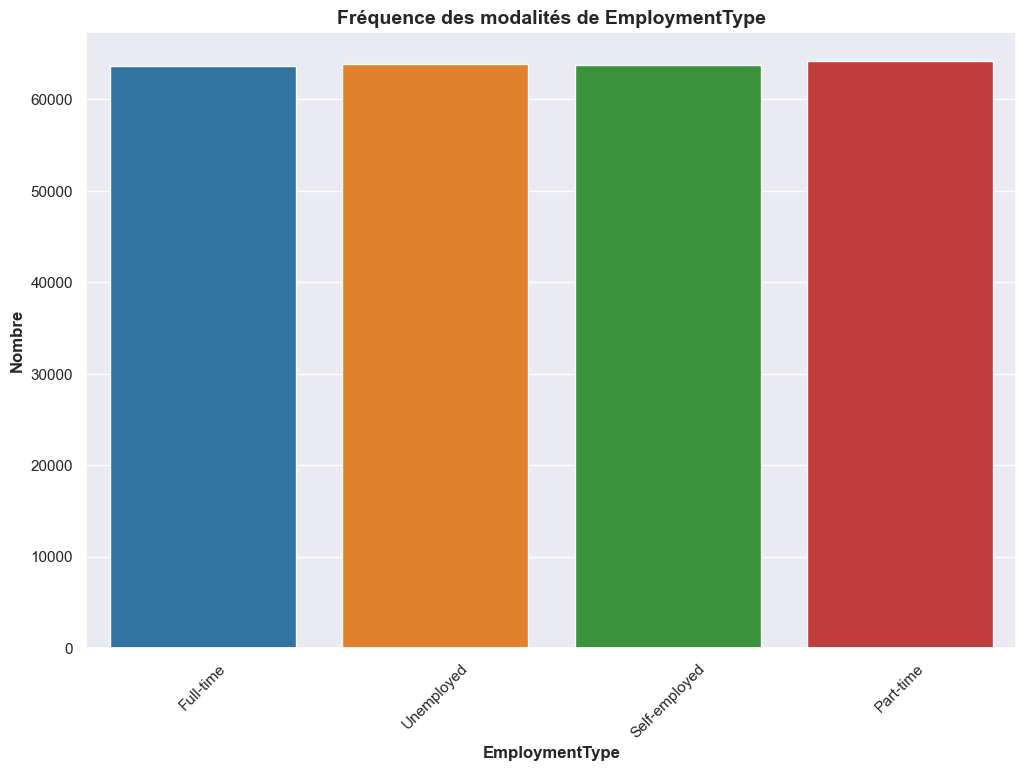

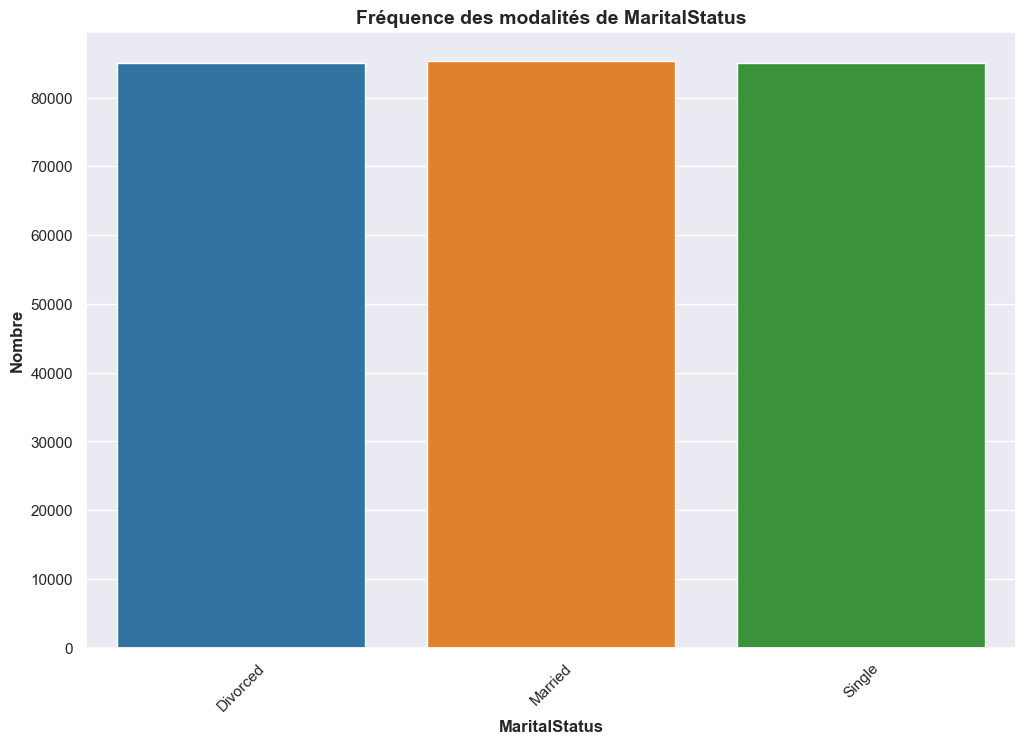

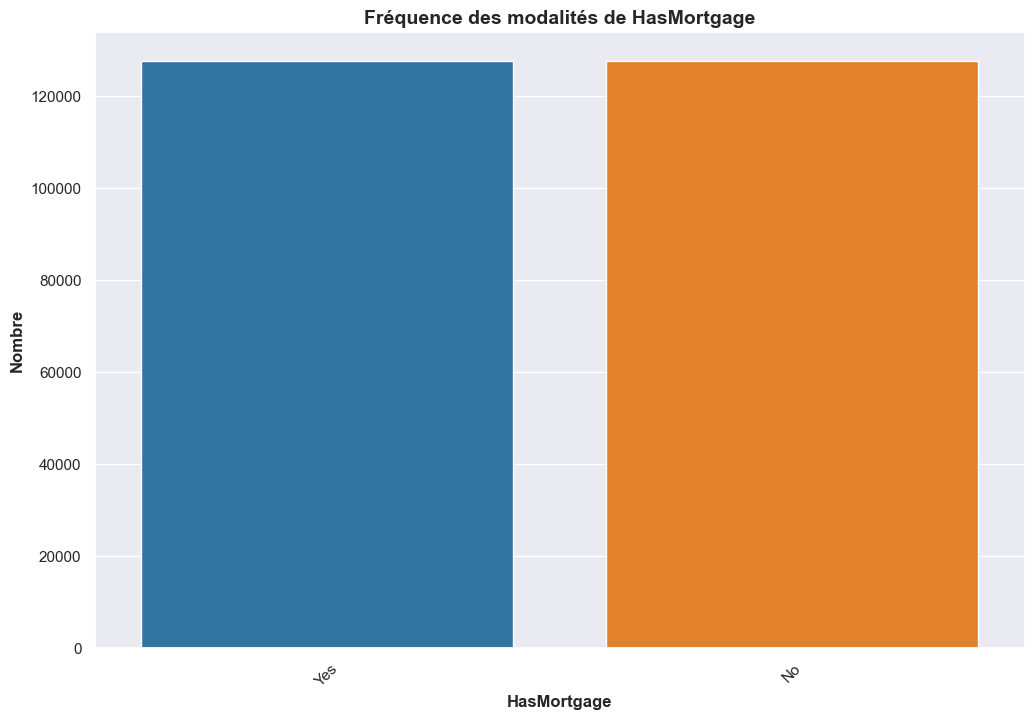

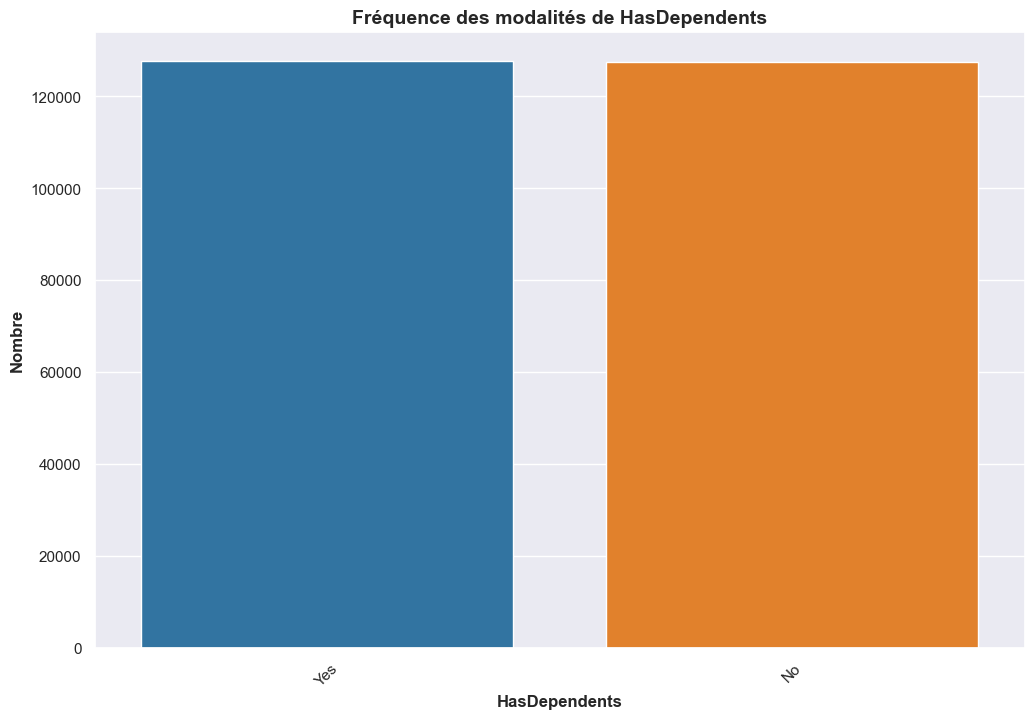

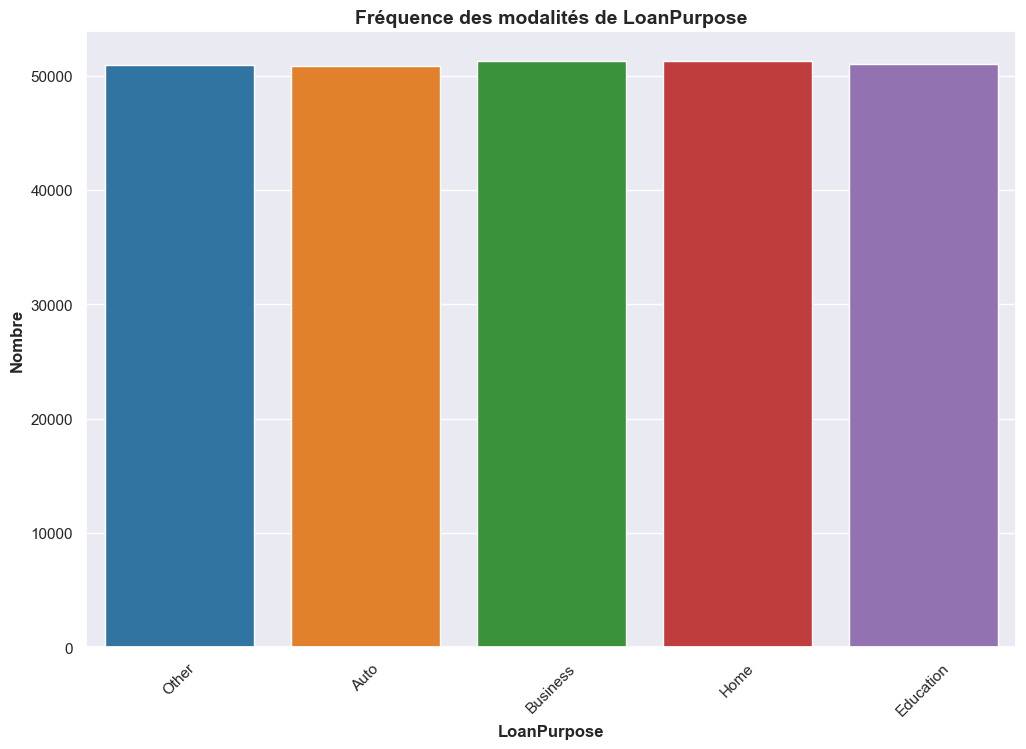

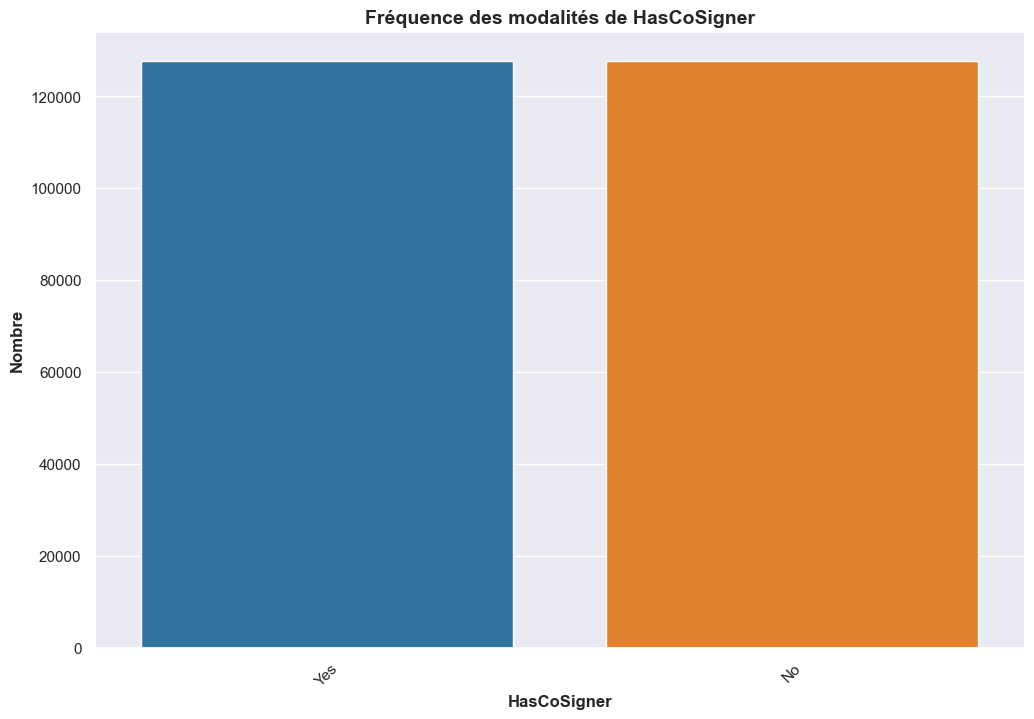

In [15]:
qual_vars = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if col != "LoanID" # exclusion manuelle
]

for col in qual_vars:
    sns.countplot(data=df, x=col, hue=col, legend=False, palette="tab10")#10 Couleurs différentes
    plt.xlabel(col, fontweight="bold")
    plt.ylabel("Nombre", fontweight="bold")
    plt.xticks(rotation=45)
    plt.title(f"Fréquence des modalités de {col}", fontsize=14, fontweight="bold")
    plt.show()

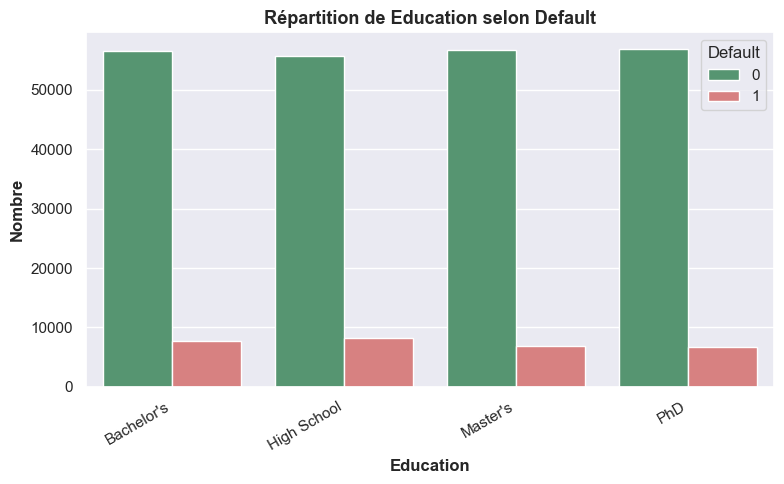

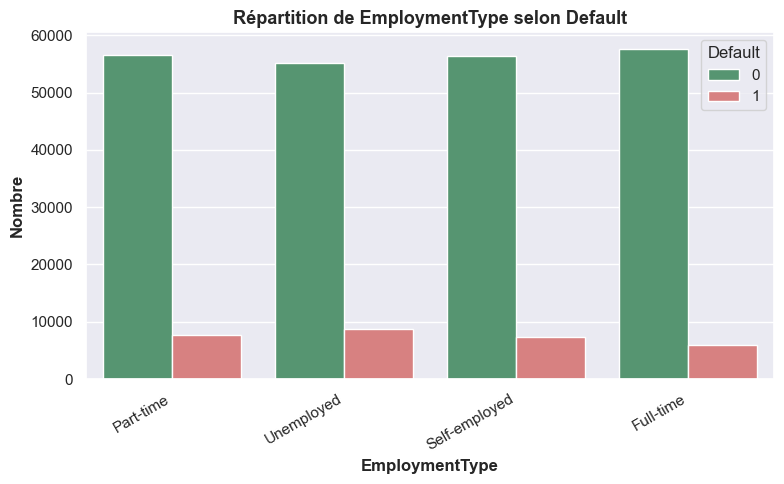

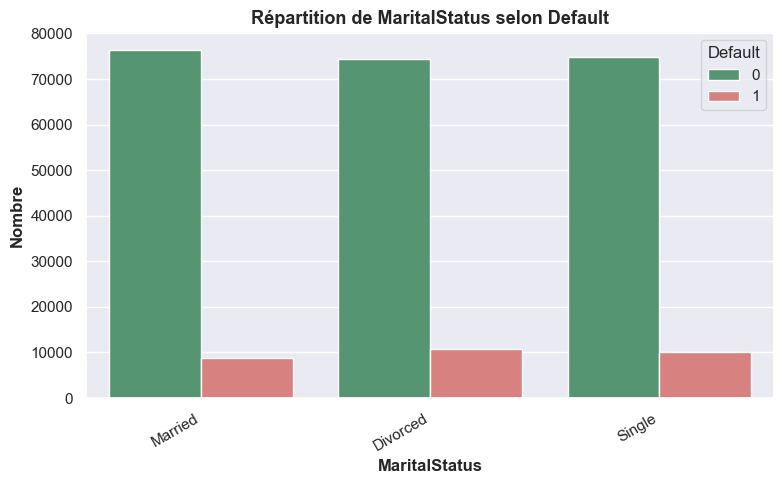

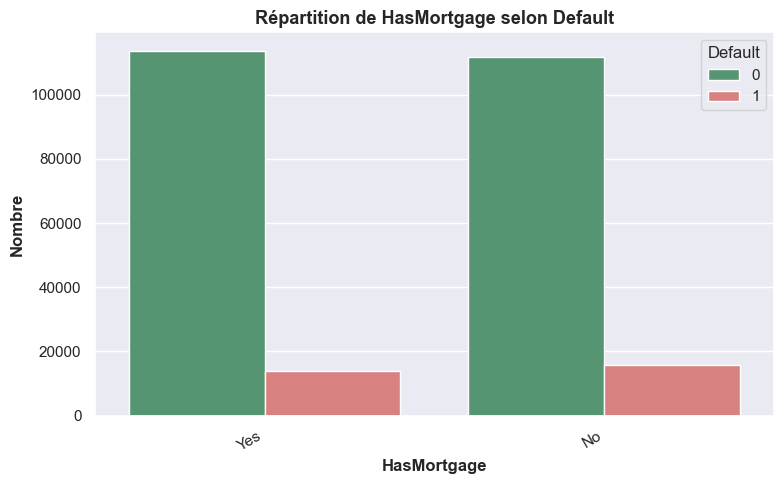

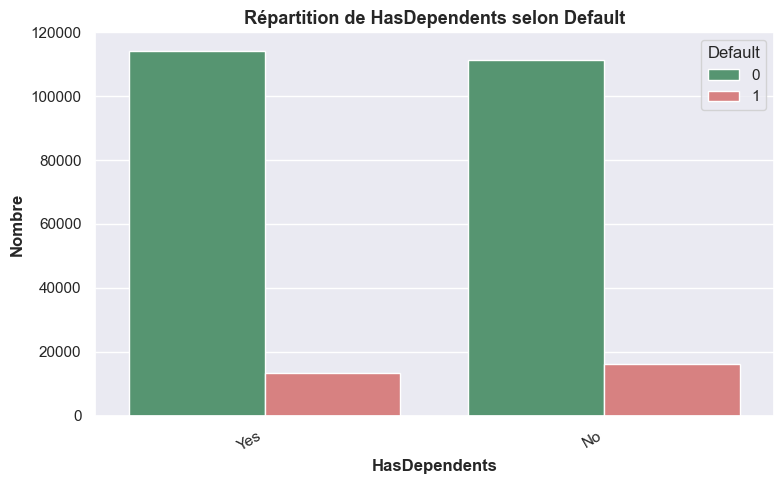

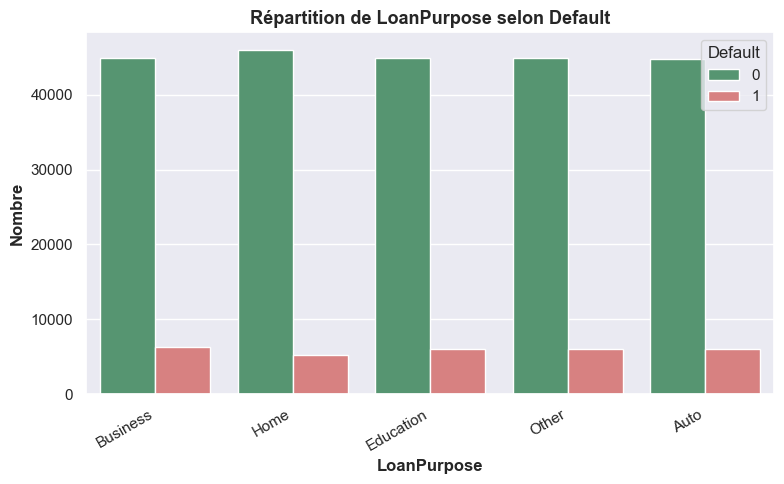

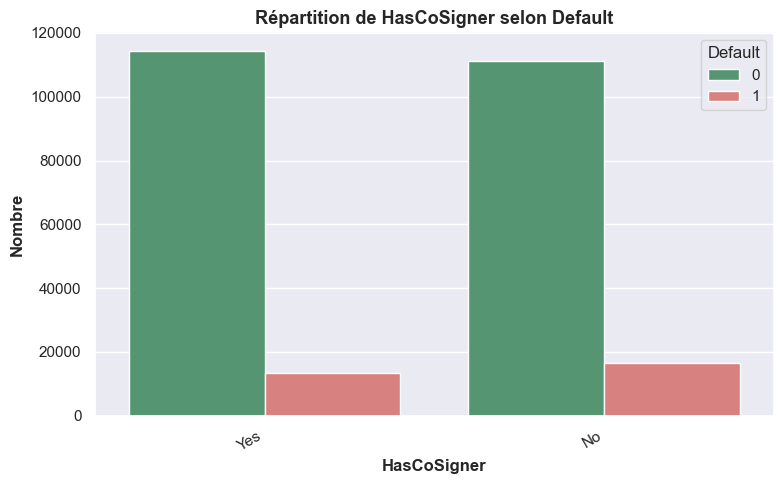

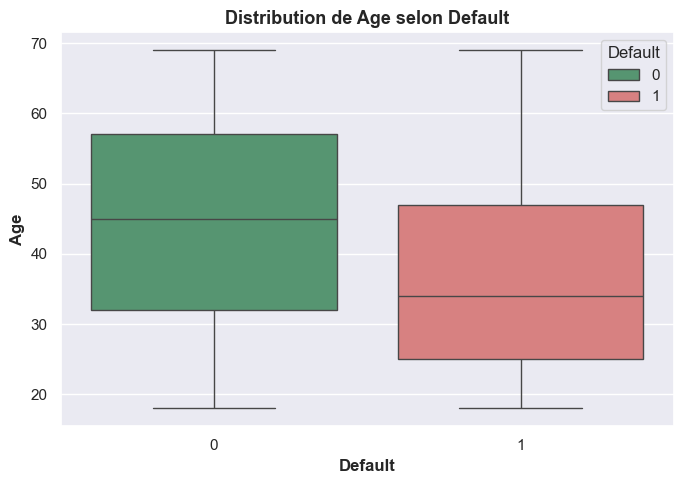

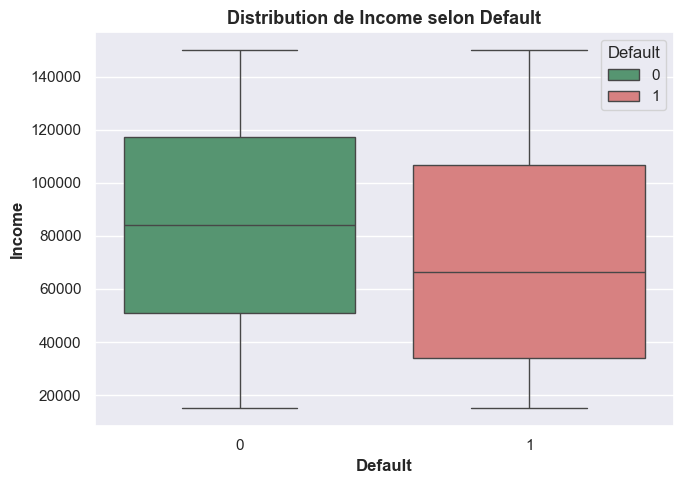

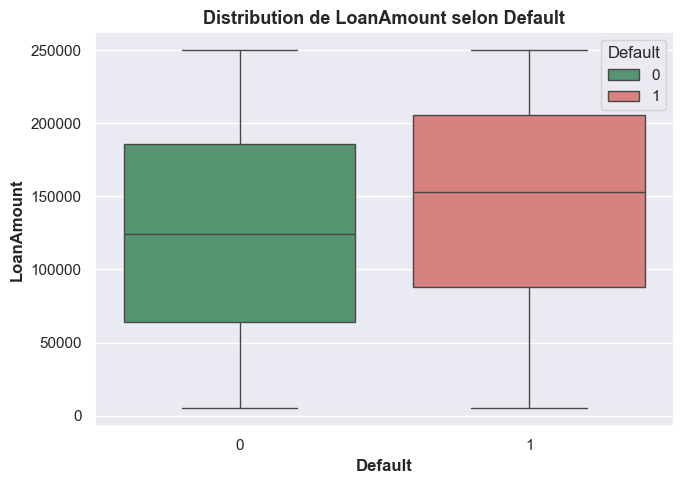

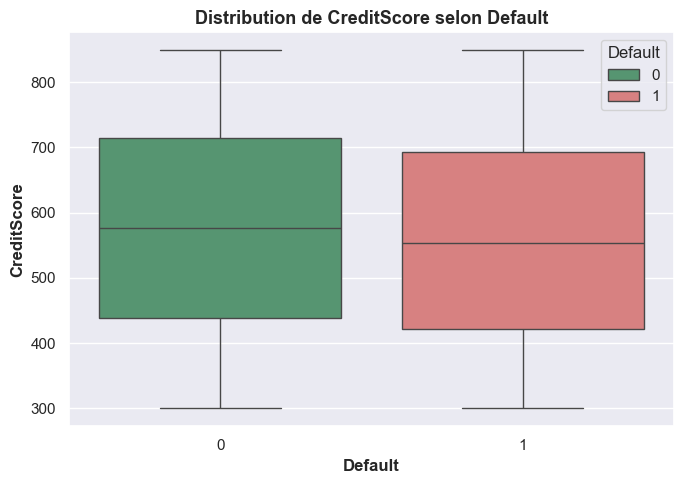

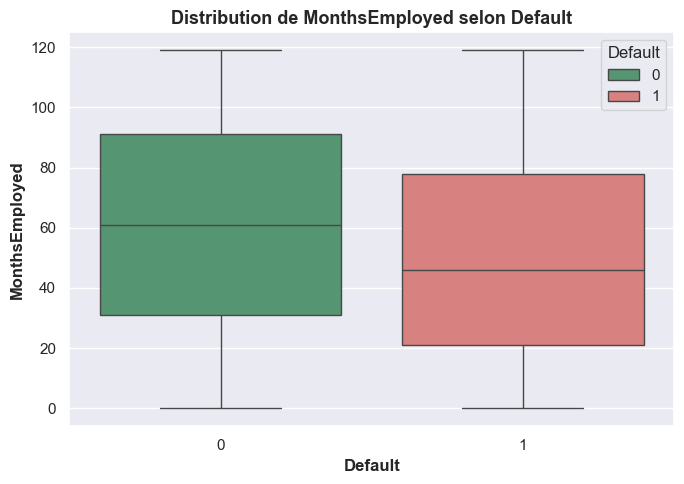

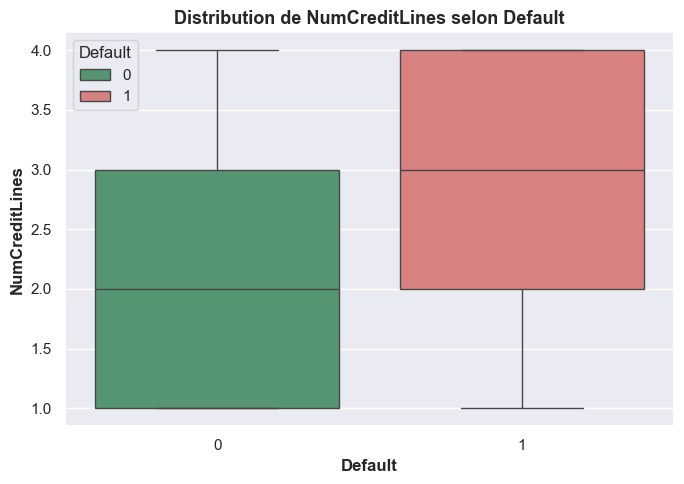

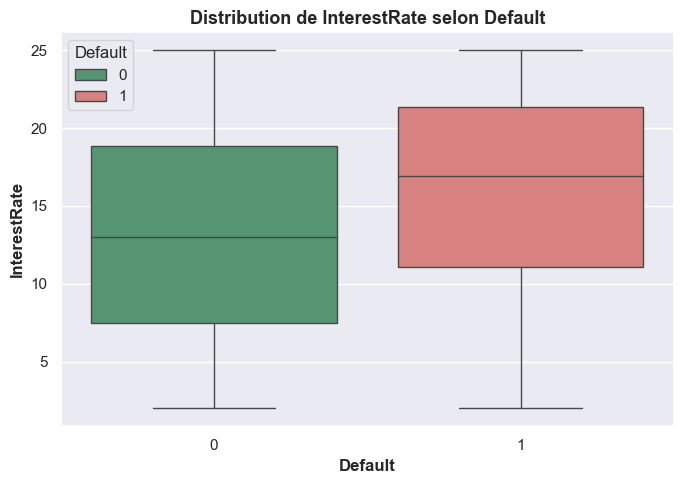

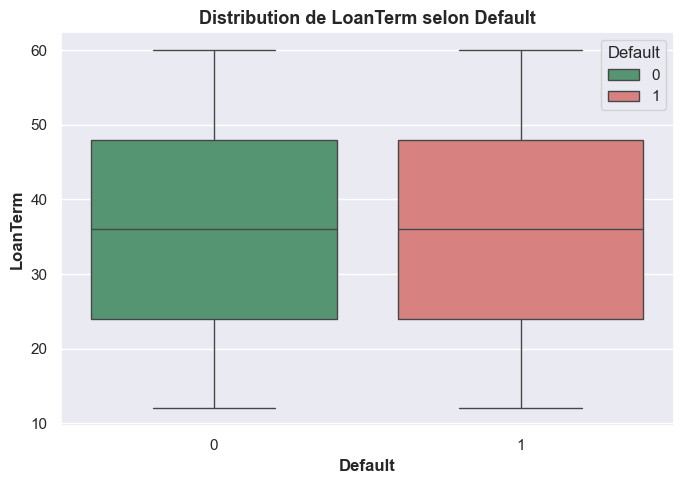

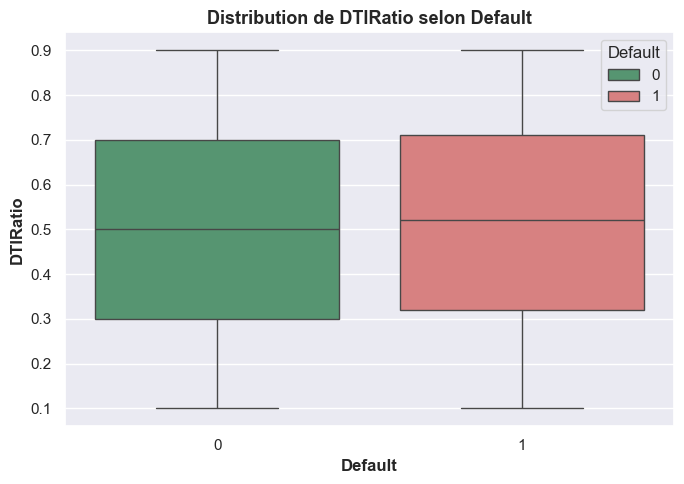

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


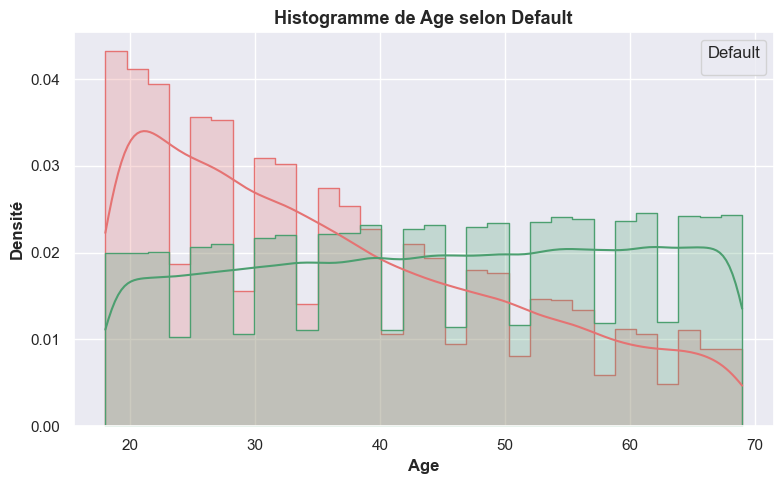

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


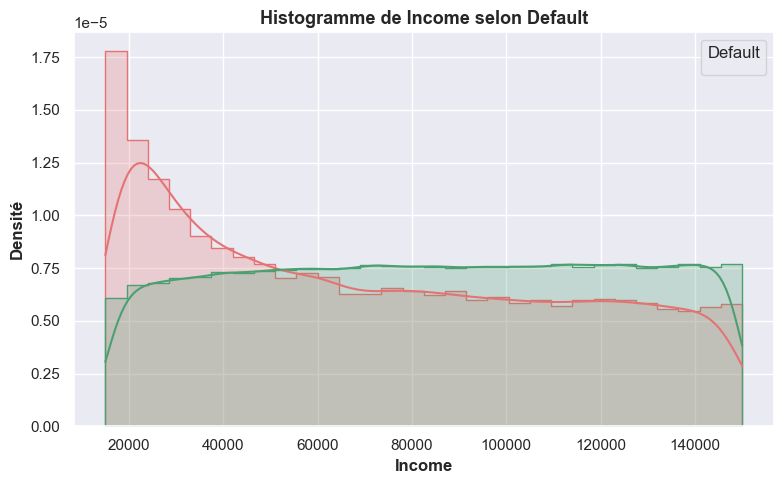

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


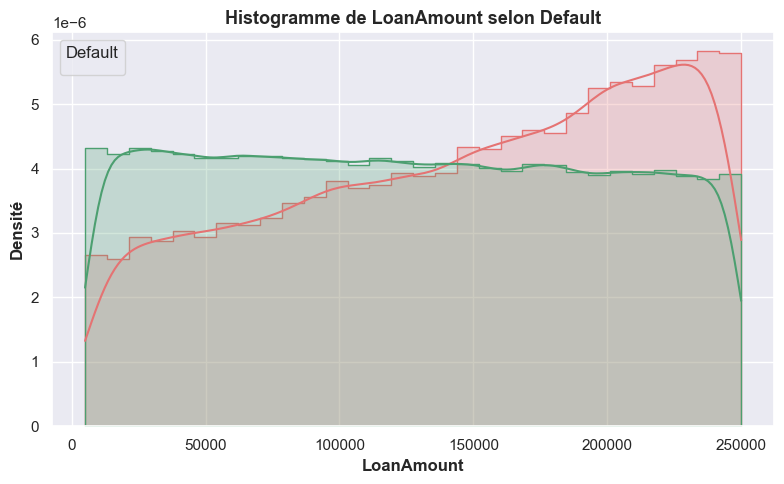

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


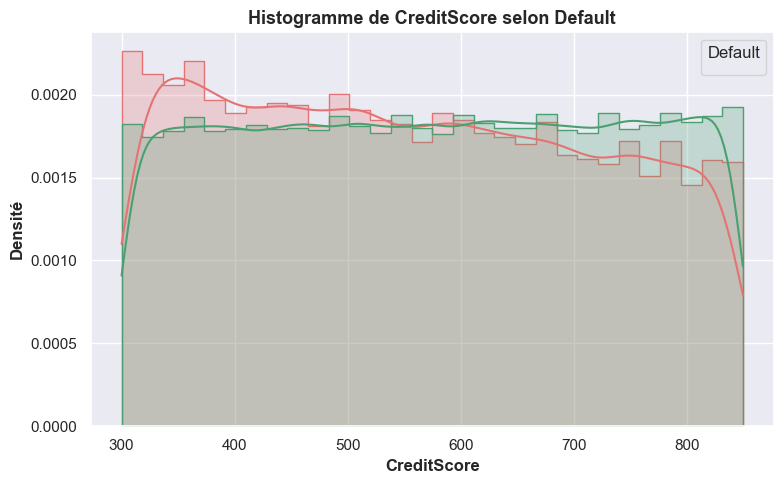

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


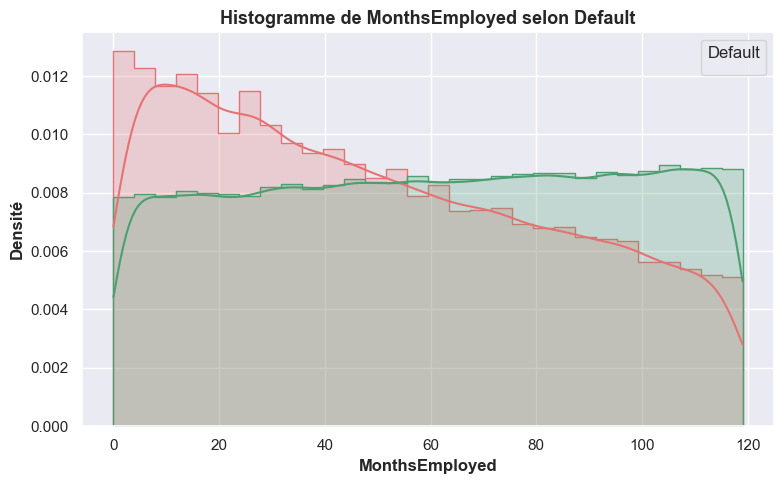

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


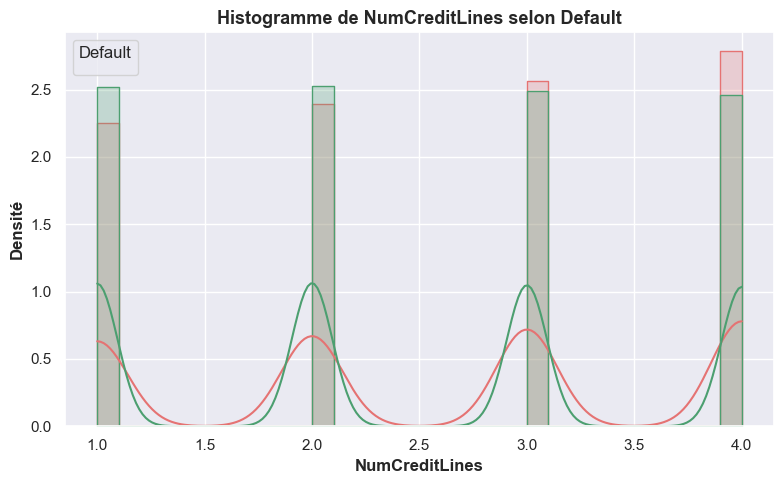

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


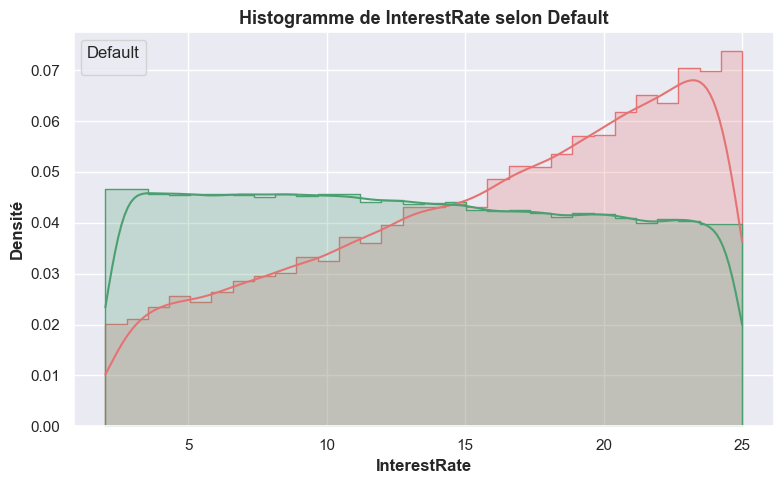

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


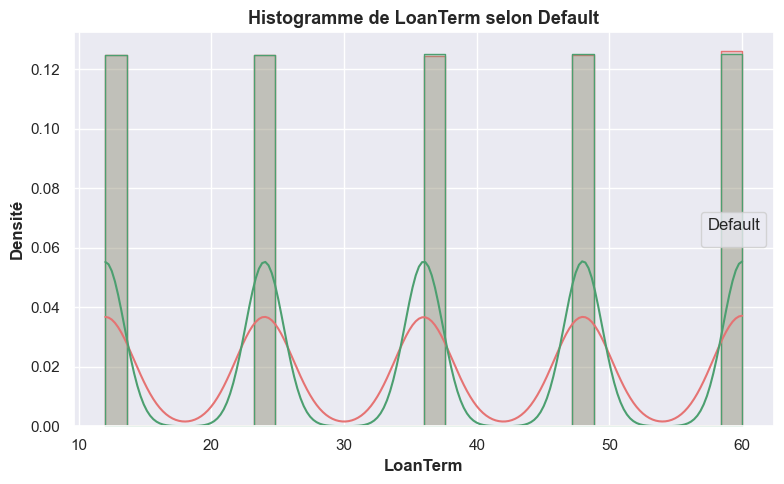

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30240\3835814865.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)   # la légende correspond à Default=0/1


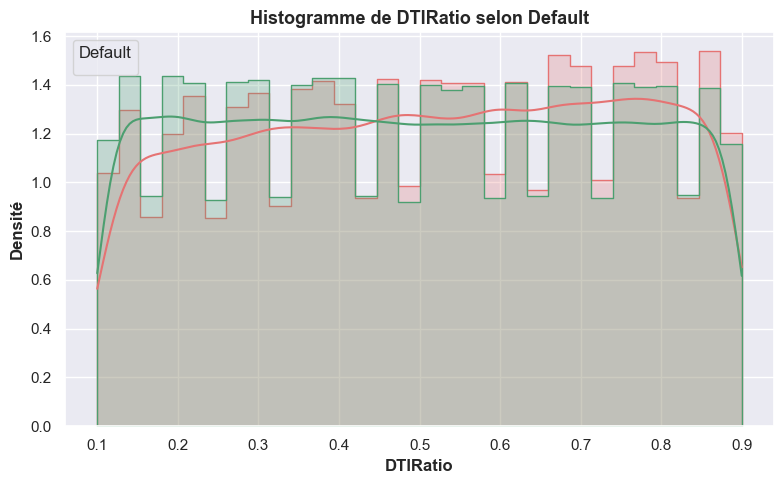

In [18]:
# --- Paramètres généraux
target = "Default"

# Détection robuste des types
quant_vars = df.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()
quant_vars = [c for c in quant_vars if c != target]  # on exclut la cible des quantitatives


# Palette binaire pour la cible
pal_target = {0: "#4C9F70", 1: "#E57373"}  # non-défaut, défaut

# -------------------------------
# 1) Qualitatives vs cible (countplot)
# -------------------------------
for col in qual_vars:
    # ordre par fréquence
    order = df[col].value_counts(dropna=False).index
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue=target, order=order, palette=pal_target)
    plt.title(f"Répartition de {col} selon {target}", fontsize=13, fontweight="bold")
    plt.xlabel(col, fontweight="bold")
    plt.ylabel("Nombre", fontweight="bold")
    plt.xticks(rotation=30, ha="right")
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()

# --- 2. Quantitatives vs cible - Boxplots ---
for col in quant_vars:
    plt.figure(figsize=(7, 5))
    # hue=target est nécessaire si palette est fournie
    sns.boxplot(data=df, x=target, y=col, hue=target,
                palette=pal_target, dodge=False)
    
    plt.title(f"Distribution de {col} selon {target}", fontsize=13, fontweight="bold")
    plt.xlabel(target, fontweight="bold")
    plt.ylabel(col, fontweight="bold")
    plt.legend(title=target)   # plus d’erreur ici
    plt.tight_layout()
    plt.show()

# --- 3. Quantitatives vs cible - Histogrammes ---
for col in quant_vars:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target, kde=True, element="step",
                 stat="density", common_norm=False, palette=pal_target, bins=30)
    
    plt.title(f"Histogramme de {col} selon {target}", fontsize=13, fontweight="bold")
    plt.xlabel(col, fontweight="bold")
    plt.ylabel("Densité", fontweight="bold")
    plt.legend(title=target)   # la légende correspond à Default=0/1
    plt.tight_layout()
    plt.show()
